# Вступ

Хоч sage є надбудовою над Python 3, в ньому багато що відбувається по-іншому. Розглянемо ряд прикладів, які дадуть вам уявлення про можливості sage з коробки.  

## 1. Символьні обчислення

В sage є глобальна змінна `x`, яка є просто символом без області визначення. Можна додатково задати над яким полем ми розглядаємо її, але це трохи пізніше. 

In [4]:
tmp = (x + x) ** 2 + (x + 5)

In [5]:
result = integral(exp(x+x^2)/(x+1), x)  

В кожного обʼєкта є внутрішнє представлення в Latex і ASCII форматах.

In [3]:
ascii_art(result)

  /          
 |           
 |   2       
 |  x  + x   
 | e         
 | ------- dx
 |  x + 1    
 |           
/            

In [6]:
latex(result)

\int \frac{e^{\left(x^{2} + x\right)}}{x + 1}\,{d x}

Можна створити свої символьні змінні. Вони будуть існувати як глобальні з такими ж назвами. 

In [16]:
var('a b c d')

(a, b, c, d)

Можна створити символьну матрицю і знайти її обернену, характеристичний поліном і власні числа. 

In [17]:
A = Matrix([
    [a, b], 
    [c, d]
])
A

[a b]
[c d]

In [18]:
A.inverse()

[1/a - b*c/(a^2*(b*c/a - d))           b/(a*(b*c/a - d))]
[          c/(a*(b*c/a - d))              -1/(b*c/a - d)]

In [19]:
A.charpoly()

x^2 + (-a - d)*x - b*c + a*d

In [20]:
A.eigenvalues()

[1/2*a + 1/2*d - 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
 1/2*a + 1/2*d + 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2)]

## 2. Таблички

In [7]:
t = table([
    ['sdflsdjfhsl', 'sldkfjsdl', 23423423, x**2 / (x + 1)], 
    ['sdfka', 'sldkfjsdl', 23423423, x**2 / (x + 1)], 
    ['aaaaaaadjfhsl', 110 / (12 + x + (1 / (2 - x))), 23, x**2 / (x + 1)], 
])


In [9]:
t

sdflsdjfhsl,sldkfjsdl,\(23423423\),\(\frac{x^{2}}{x + 1}\)
sdfka,sldkfjsdl,\(23423423\),\(\frac{x^{2}}{x + 1}\)
aaaaaaadjfhsl,\(\frac{110}{x - \frac{1}{x - 2} + 12}\),\(23\),\(\frac{x^{2}}{x + 1}\)


In [8]:
latex(t)

\begin{tabular}{llll}
sdflsdjfhsl & sldkfjsdl & $23423423$ & $\frac{x^{2}}{x + 1}$ \\
sdfka & sldkfjsdl & $23423423$ & $\frac{x^{2}}{x + 1}$ \\
aaaaaaadjfhsl & $\frac{110}{x - \frac{1}{x - 2} + 12}$ & $23$ & $\frac{x^{2}}{x + 1}$ \\
\end{tabular}

## 3. Константи

В sage всі `int`, `float` i `complex` числа при запуску обгортуються своїм кастомним класом:

In [10]:
type(2)

<class 'sage.rings.integer.Integer'>

при чому, цілі числа при діленні дають раціональне число, а не дійсне: 

In [14]:
4 / 6

2/3

In [15]:
type(3 / 6)

<class 'sage.rings.rational.Rational'>

хоча дійсні числа теж є

In [12]:
type(12.32131231)

<class 'sage.rings.real_mpfr.RealLiteral'>

## 4. Поля

В sage є стандартні поля раціональних чисел, дійсних чисел, комплексних, а також дуже просто можна створити поля лишків: 

In [22]:
QQ

Rational Field

In [23]:
RR

Real Field with 53 bits of precision

In [24]:
CC

Complex Field with 53 bits of precision

In [25]:
P = Integers(11)
P

Ring of integers modulo 11

In [26]:
P.is_field()

True

Над цими полями можна створювати, наприклад, матриці: 

In [29]:
a = Matrix(QQ, [
    [2/3, 2, 8], 
    [3, 2, 2], 
    [4, 2, 0]
])
a

[2/3   2   8]
[  3   2   2]
[  4   2   0]

In [30]:
a.inverse()

[  3/2    -6   9/2]
[   -3    12 -17/2]
[  3/4  -5/2   7/4]

In [31]:
a = Matrix(RR, [
    [2/3, 2, 8], 
    [3, 2, 2], 
    [4, 2, 0]
])
a

[0.666666666666667  2.00000000000000  8.00000000000000]
[ 3.00000000000000  2.00000000000000  2.00000000000000]
[ 4.00000000000000  2.00000000000000 0.000000000000000]

In [32]:
a.inverse()

[ 1.50000000000000 -6.00000000000001  4.50000000000001]
[-3.00000000000000  12.0000000000000 -8.50000000000001]
[0.750000000000001 -2.50000000000000  1.75000000000000]

In [33]:
a = Matrix(P, [
    [2, 2, 8], 
    [3, 2, 2], 
    [4, 2, 0]
])
a

[2 2 8]
[3 2 2]
[4 2 0]

In [34]:
# обернена матриця в полі Z_11
a.inverse()

[ 6  9  7]
[10  4  3]
[ 3  5  3]

## 5. Многочлени

In [35]:
(x**3 + x + 1).roots()

[(-1/2*(1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3)*(I*sqrt(3) + 1) + 1/6*(-I*sqrt(3) + 1)/(1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3),
  1),
 (-1/2*(1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3)*(-I*sqrt(3) + 1) + 1/6*(I*sqrt(3) + 1)/(1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3),
  1),
 ((1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3) - 1/3/(1/18*sqrt(31)*sqrt(3) - 1/2)^(1/3),
  1)]

In [50]:
factor(x^4 - x^3 - 2 * x^2 - x + 3)

(x^3 - 2*x - 3)*(x - 1)

## 6. Графи

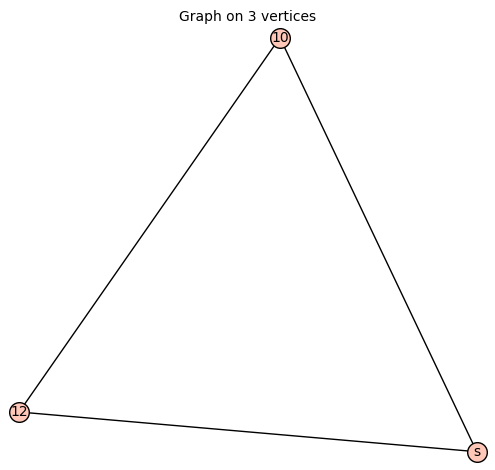

In [52]:
G = Graph()
G.add_vertex(10)
G.add_vertex('s')
G.add_vertex(12)
G.add_edge(10, 12)
G.add_edge(12, 's')
G.add_edge('s', 10)
G

In [53]:
G.is_tree()

False